In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import numpy as np
sys.path.append('/Users/rubybyrne/rlb_MWA/sky_imaging')
import plot_fits
import plot_healpix_map
import healpix_utils
import scipy.io

In [2]:
obs_list_1 = [
    '1131551744',
    '1130783824',
    '1131562544',
    '1131709912',
    '1130776864',
    '1131461496',
    '1130782264',
    #'1131454176', high power and systematics in Stokes V
    '1131715432',
    '1131733552',
    '1131542624',
    '1130773144',
    '1131461376',
    '1131557144',
    '1131454296',
    '1131731752',
    '1130778664',
    '1131470496',
    '1131559064',
    '1131717232',
    '1131463536',
    '1130773264',
    '1131463416',
    '1131717352',
    '1131713632',
    '1131478056',
    '1131468936',
    '1131468696',
    '1131535424',
    '1131463296',
    '1131465216',
    '1131710032',
    '1130776624',
    '1131456096',
    #'1131456216',
    '1131540824',
    '1131711952',
    '1131459576',
    '1131477936',
    '1131733672',
    '1131564464',
    '1130787784',
    #'1131475896',
    '1131461616',
    '1131558944',
    '1131470616',
    '1131549944',
    '1131553544',
    #'1131477816',
    '1131459696',
    '1130780464',
    '1131726352',
    #'1131715312',
    '1131470736',
    '1131548024',
    '1131710152',
    '1130785864',
    #'1131724672',
    '1131544424'
]
obs_list_2 = ['1131542504',
    #'1131717112',
    '1131733432',
    '1131735232',
    '1131553664',
    '1131724432',
    '1131542744',
    '1131455976',
    '1131719152',
    '1131454416',
    #'1131728032',
    '1130787544',
    '1130776744',
    #'1131726472',
    '1130780224',
    '1131551624',
    '1131722632',
    '1131547904',
    '1130776624',
    '1131562664',
    '1131550064',
    '1131537104',
    '1131555224',
    '1131467136',
    '1131539024',
    '1131555344',
    '1131546104',
    '1131548144',
    '1131472416',
    '1131558824',
    '1131544304',
    '1130789584',
    '1131476136',
    '1130789344',
    #'1131728272',
    '1131722872',
    '1130785744',
    '1131730072',
    '1131459816',
    '1131564584',
    '1131457776',
    '1131724552',
    '1130787664',
    '1130778424',
    '1131728152',
    '1131722752',
    '1131538904',
    '1131544544',
    '1130778544',
    '1131467016',
    '1131546344',
    '1130789464',
    '1131713512',
    '1131546224',
    '1131474336',
    '1130782144',
    '1131735472',
    '1130775064',
    '1130774824',
    '1131720832',
    '1130774944',
    '1131557264',
    '1130783944',
    #'1131713752',
    '1131472296',
    '1131465096',
    '1131457896',
    '1131555464',
    #'1131720712',
    #'1131711832',
    '1131562424',
    '1131551864',
    '1131540704',
    '1130780344',
    '1131731632',
    '1131468816',
    #'1131711712',
    '1131472536',
    #'1131729832',
    '1130773024',
    #'1131720952',
    #'1131718912',
    #'1131719032',
    '1131474096',
    '1131465336',
    '1131715552',
    '1131458016',
    '1131540944',
    '1131557024',
    '1131731872',
    '1131553424',
    '1131560864',
    '1130784064',
    '1131466896',
    '1130782024',
    '1131560624',
    '1131474216',
    '1131564344',
    '1131729952',
    '1131560744',
    '1130785624',
    '1131709432',
    '1131536624',
    '1131536384',
    '1131711112',
    '1131709192',
    '1131710992',
    #'1131709792', stripes in V
    '1131453456',
    '1131565304',
    '1131478776',
    '1131566504',
    '1131565184',
    '1131566624',
    '1131566744',
    '1131565064',
    '1131567944',
    '1131478656',
    '1131568544',
    #'1131740872', excess power
    '1131739432',
    '1130788504',
    '1130788264',
    '1131740752',
    #'1131735952', # maybe excess power
    #'1131739552', excess power
    '1131455736',
    '1131710392',
    '1131708952',
    '1131457176',
    '1131716512',
    #'1131713272', excess power
    '1131458976',
    '1131712192',
    '1131453936',
    '1131457536',
    '1131537704',
    '1131543584'
]
c = 3.e8

In [32]:
def get_effective_rotation_angles(rms, start_freq_mhz, end_freq_mhz):

    wl_max = c/(start_freq_mhz*1.e6)
    wl_min = c/(end_freq_mhz*1.e6)
    fresS_min, fresC_min = scipy.special.fresnel(2*np.sqrt(rms/np.pi+0j)*wl_min)
    fresS_max, fresC_max = scipy.special.fresnel(2*np.sqrt(rms/np.pi+0j)*wl_max)
    cos_int = (
        np.cos(2.*rms*wl_min**2.)/wl_min
        - np.cos(2.*rms*wl_max**2.)/wl_max
        + 2*np.sqrt(np.pi*rms+0j)*(fresS_min-fresS_max)
    )
    sin_int = (
        np.sin(2.*rms*wl_min**2.)/wl_min
        - np.sin(2.*rms*wl_max**2.)/wl_max
        - 2*np.sqrt(np.pi*rms+0j)*(fresC_min-fresC_max)
    )
    rot_angles = np.arctan2(np.real(sin_int), np.real(cos_int))
    return rot_angles


def create_rm_lookup_table(start_freq_mhz, end_freq_mhz):

    min_rm = -4
    max_rm = 0
    stepsize = 1e-6
    rms = np.arange(min_rm, max_rm, stepsize)
    rot_angles = get_effective_rotation_angles(rms, start_freq_mhz, end_freq_mhz)
    return rot_angles, rms


In [13]:
rm_file='/Users/rubybyrne/diffuse_survey_rm_tot.csv'
start_freq_mhz=167.
end_freq_mhz=198.

In [33]:
rot_angles_lookup, rms_lookup = create_rm_lookup_table(
    start_freq_mhz, end_freq_mhz
)

In [34]:
# Get RMs
rm_data = np.genfromtxt(
    rm_file, delimiter=',', dtype=None, names=True, encoding=None
)
rms_orig = np.array([
    rm_data['RM'][np.where(rm_data['ObsID'] == int(obsid))][0] for obsid in obs_list_1+obs_list_2
])
rot_angles = get_effective_rotation_angles(
    rms_orig, start_freq_mhz, end_freq_mhz
)

0.581303723992
0


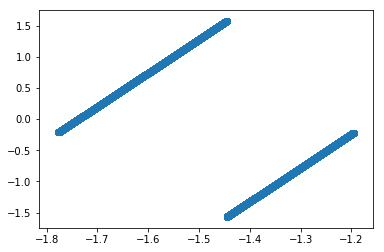

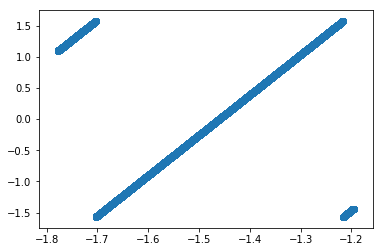

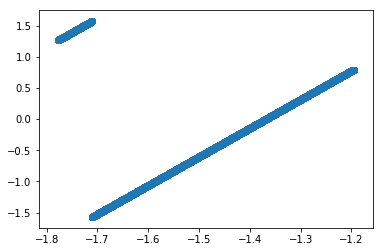

5.25864766479162e-14


In [25]:
search_range = np.pi*((start_freq_mhz+end_freq_mhz)/2*1.e6)**2/(2*c**2)
print search_range
for obsind in range(1):
    print obsind
    limited_lookup_indices = np.where(
        np.abs(rms_lookup-rms_orig[obsind]) < search_range/2
    )[0]
    plt.scatter(rms_lookup[limited_lookup_indices], rot_angles_lookup[limited_lookup_indices])
    plt.show()
    plt.scatter(rms_lookup[limited_lookup_indices], np.arctan(np.tan(2*rms_lookup[limited_lookup_indices]*c**2/(start_freq_mhz*1.e6)**2)))
    plt.show()
    plt.scatter(rms_lookup[limited_lookup_indices], np.arctan(np.tan(2*rms_lookup[limited_lookup_indices]*c**2/(end_freq_mhz*1.e6)**2)))
    plt.show()
    interp_func = scipy.interpolate.interp1d(
        rot_angles_lookup[limited_lookup_indices],
        rms_lookup[limited_lookup_indices],
        kind='cubic', bounds_error=True
    )
    interp_rm_val = interp_func(rot_angles[obsind])
    print np.abs((interp_rm_val-rms_orig[obsind])/rms_orig[obsind])

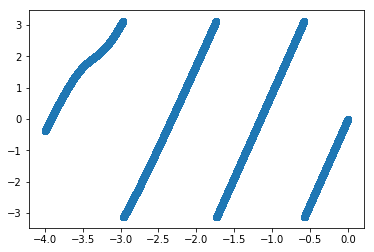

In [35]:
plt.scatter(rms_lookup, rot_angles_lookup)
plt.show()

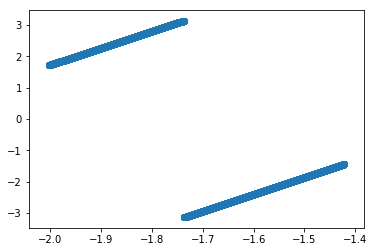

In [37]:
search_range = np.pi*((start_freq_mhz+end_freq_mhz)/2*1.e6)**2/(2*c**2)

rms_orig_use = -1.712824
limited_lookup_indices = np.where(
    np.abs(rms_lookup-rms_orig_use) < search_range/2
)[0]
plt.scatter(rms_lookup[limited_lookup_indices], rot_angles_lookup[limited_lookup_indices])
plt.show()

In [21]:
print search_range/2

1.16260744798


In [22]:
((start_freq_mhz+end_freq_mhz)/2*1.e6)**2/c**2

0.37006944444444445

In [38]:
# Get RMs
rm_data = np.genfromtxt(
    rm_file, delimiter=',', dtype=None, names=True, encoding=None
)
rms_orig = np.array([
    rm_data['RM'][np.where(rm_data['ObsID'] == int(obsid))][0] for obsid in obs_list_1+obs_list_2
])
rot_angles_orig = get_effective_rotation_angles(
    rms_orig, start_freq_mhz, end_freq_mhz
)

In [56]:
# Get New RMs
rm_data_new = np.genfromtxt(
    '/Users/rubybyrne/diffuse_survey_rm_empirical.csv', delimiter=',', dtype=None, names=True, encoding=None
)
rms_new = np.array([
    rm_data_new['RM'][np.where(rm_data_new['ObsID'] == int(obsid))][0] for obsid in obs_list_1+obs_list_2
])
rot_angles_new = get_effective_rotation_angles(
    rms_new, start_freq_mhz, end_freq_mhz
)

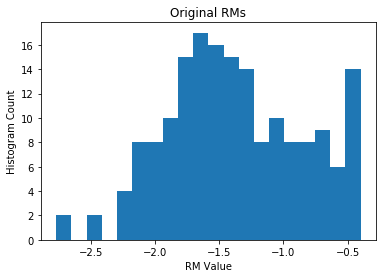

In [78]:
plt.hist(rms_orig, bins=20)
plt.xlabel('RM Value')
plt.ylabel('Histogram Count')
plt.title('Original RMs')
plt.savefig('/Users/rubybyrne/Downloads/orig_rms.png')

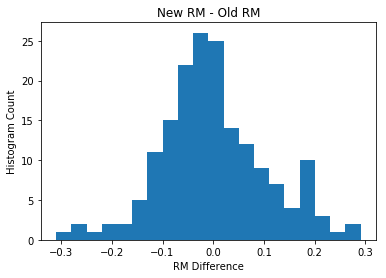

In [79]:
#plot_range = [-3,0]
#nbins = 20
#bins = np.linspace(plot_range[0], plot_range[1], num=nbins+1)

plt.hist(rms_new-rms_orig, bins=20)
plt.xlabel('RM Difference')
plt.ylabel('Histogram Count')
plt.title('New RM - Old RM')
plt.savefig('/Users/rubybyrne/Downloads/rms_diff.png')
plt.show()

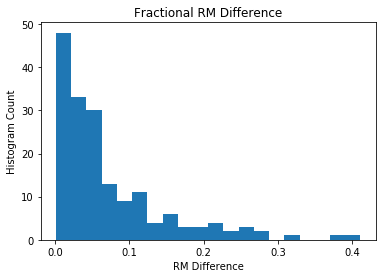

In [80]:
#plot_range = [-3,0]
#nbins = 20
#bins = np.linspace(plot_range[0], plot_range[1], num=nbins+1)

plt.hist(np.abs((rms_new-rms_orig)/rms_orig), bins=20)
plt.xlabel('RM Difference')
plt.ylabel('Histogram Count')
plt.title('Fractional RM Difference')
plt.savefig('/Users/rubybyrne/Downloads/rms_frac_diff.png')
plt.show()

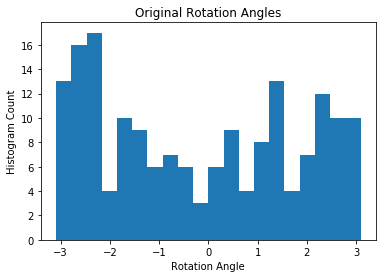

In [81]:
plt.hist(rot_angles_orig, bins=20)
plt.xlabel('Rotation Angle')
plt.ylabel('Histogram Count')
plt.title('Original Rotation Angles')
plt.savefig('/Users/rubybyrne/Downloads/rot_angle.png')
plt.show()

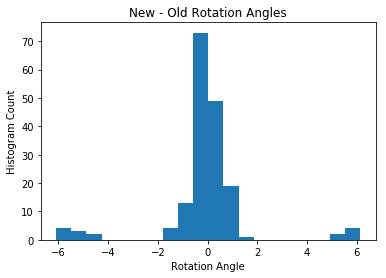

In [68]:
plt.hist(rot_angles_new-rot_angles_orig, bins=20)
plt.xlabel('Rotation Angle')
plt.ylabel('Histogram Count')
plt.title('New - Old Rotation Angles')
plt.show()

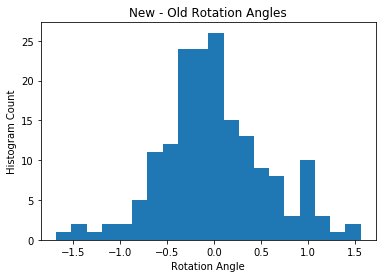

In [82]:
hist_vals = rot_angles_new-rot_angles_orig
hist_vals[np.where(hist_vals > np.pi)] -= 2*np.pi
hist_vals[np.where(hist_vals < -np.pi)] += 2*np.pi
plt.hist(hist_vals, bins=20)
plt.xlabel('Rotation Angle')
plt.ylabel('Histogram Count')
plt.title('New - Old Rotation Angles')
plt.savefig('/Users/rubybyrne/Downloads/rot_angle_diff.png')
plt.show()